In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

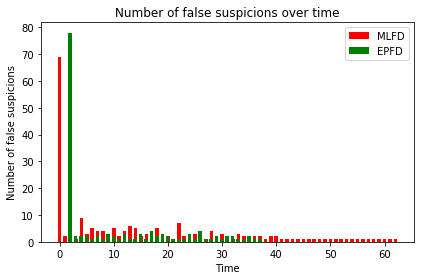

In [9]:
mlfd_false_suspicions = pd.read_csv('test1_pmargin=3/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
epfd_false_suspicions = pd.read_csv('test2_delta=2000/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
bar_width = 0.65
error_config = {'ecolor': '0.3'}
index1 = np.arange(len(mlfd_false_suspicions.values))
index2 = np.arange(len(epfd_false_suspicions.values))
plt.bar(index1, mlfd_false_suspicions.values, width=bar_width, color='r', error_kw=error_config, label='MLFD')
plt.bar(index2 + bar_width*3, epfd_false_suspicions.values, width=bar_width, color='g', error_kw=error_config, label='EPFD')
plt.xlabel('Time')
plt.ylabel('Number of false suspicions')
plt.title('Number of false suspicions over time')
plt.legend()
#lt.xticks(index1 + bar_width, ('MLFD', 'EPFD'))
plt.tight_layout()
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([0,10])

In [15]:
test_info = pd.read_csv("./test_info_mlfd.csv")
test_info

,test,workersCount,locationsCount,sampleSize,defaultMean,hbTimeout,stdDevCount,geoFactor,crashProb,delta,...,learningRate,regParam,numIterations,messageLossProb,stdevMargin,stdevFactor,pattern,rand,averageDetectiontime,mistakeRate
0,mlfd_test,100,20,200,3000.0,2 seconds,30,50.0,0.001,nil,...,1.000000e-10,0.3,10,0.001,3.0,100.0,True,False,53547.932203,0.120000
1,mlfd_test,100,20,200,3000.0,2 seconds,30,50.0,0.001,nil,...,1.000000e-10,0.3,10,0.010,3.0,100.0,True,False,52787.400000,0.137778
2,mlfd_test,100,20,200,3000.0,2 seconds,30,50.0,0.001,nil,...,1.000000e-10,0.3,10,0.100,3.0,100.0,True,False,52520.967213,0.155556
3,mlfd_test,100,20,200,3000.0,2 seconds,30,50.0,0.001,nil,...,1.000000e-10,0.3,10,0.500,3.0,100.0,True,False,60427.396552,0.186111
4,mlfd_test,100,20,200,3000.0,2 seconds,30,50.0,0.001,nil,...,1.000000e-10,0.3,10,0.750,3.0,100.0,True,False,65465.852459,0.179444


## Compare effect on FD QoS metrics when increasing chance of message loss

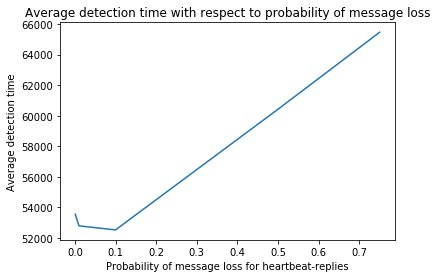

In [16]:
detect_sample = test_info.loc[:,["messageLossProb", "averageDetectiontime"]]
time = detect_sample["messageLossProb"].values
nodes = detect_sample["averageDetectiontime"].values
plt.plot(time, nodes)
plt.ylabel('Average detection time')
plt.xlabel('Probability of message loss for heartbeat-replies')
plt.title('Average detection time with respect to probability of message loss')
plt.show()

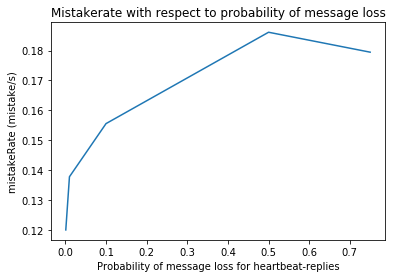

In [17]:
detect_sample = test_info.loc[:,["messageLossProb", "mistakeRate"]]
time = detect_sample["messageLossProb"].values
nodes = detect_sample["mistakeRate"].values
plt.plot(time, nodes)
plt.ylabel('mistakeRate (mistake/s)')
plt.xlabel('Probability of message loss for heartbeat-replies')
plt.title('Mistakerate with respect to probability of message loss')
plt.show()

In [18]:
test_info = pd.read_csv("./test_info_epfd.csv")
test_info

,test,workersCount,locationsCount,sampleSize,defaultMean,hbTimeout,stdDevCount,geoFactor,crashProb,delta,...,learningRate,regParam,numIterations,messageLossProb,stdevMargin,stdevFactor,pattern,rand,averageDetectiontime,mistakeRate
0,epfd_test,100,20,nil,nil,2 seconds,30,50.0,0.001,2 seconds,...,nil,nil,nil,0.010,nil,100.0,True,False,114938.300000,0.101667
1,epfd_test,100,20,nil,nil,2 seconds,30,50.0,0.001,2 seconds,...,nil,nil,nil,0.001,nil,100.0,True,False,113904.762712,0.101667
2,epfd_test,100,20,nil,nil,2 seconds,30,50.0,0.001,2 seconds,...,nil,nil,nil,0.100,nil,100.0,True,False,114609.770492,0.101667
3,epfd_test,100,20,nil,nil,2 seconds,30,50.0,0.001,2 seconds,...,nil,nil,nil,0.500,nil,100.0,True,False,114373.551724,0.106111
4,epfd_test,100,20,nil,nil,2 seconds,30,50.0,0.001,2 seconds,...,nil,nil,nil,0.750,nil,100.0,True,False,131067.983607,0.098333


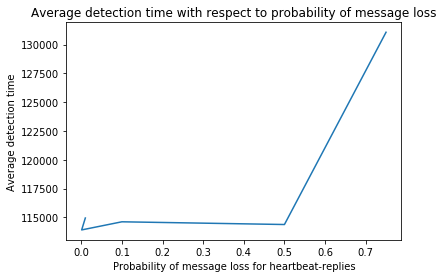

In [19]:
detect_sample = test_info.loc[:,["messageLossProb", "averageDetectiontime"]]
time = detect_sample["messageLossProb"].values
nodes = detect_sample["averageDetectiontime"].values
plt.plot(time, nodes)
plt.ylabel('Average detection time')
plt.xlabel('Probability of message loss for heartbeat-replies')
plt.title('Average detection time with respect to probability of message loss')
plt.show()

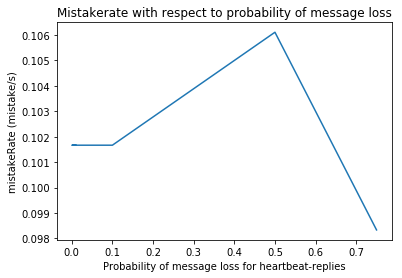

In [20]:
detect_sample = test_info.loc[:,["messageLossProb", "mistakeRate"]]
time = detect_sample["messageLossProb"].values
nodes = detect_sample["mistakeRate"].values
plt.plot(time, nodes)
plt.ylabel('mistakeRate (mistake/s)')
plt.xlabel('Probability of message loss for heartbeat-replies')
plt.title('Mistakerate with respect to probability of message loss')
plt.show()

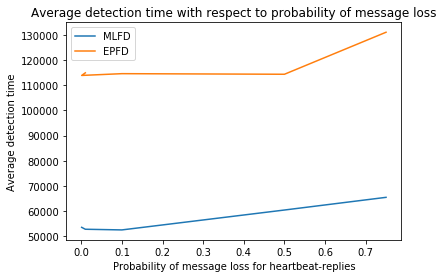

In [29]:
test_info_mlfd = pd.read_csv("./test_info_mlfd.csv")
test_info_epfd = pd.read_csv("./test_info_epfd.csv")
mlfd_data = test_info_mlfd.loc[:,["messageLossProb", "averageDetectiontime"]]
mlfd_mlp = mlfd_data["messageLossProb"].values
mlfd_adt = mlfd_data["averageDetectiontime"].values
plt.plot(mlfd_mlp, mlfd_adt, label="MLFD")
epfd_data = test_info_epfd.loc[:,["messageLossProb", "averageDetectiontime"]]
epfd_mlp = epfd_data["messageLossProb"].values
epfd_adt = epfd_data["averageDetectiontime"].values
plt.plot(epfd_mlp, epfd_adt, label="EPFD")
plt.ylabel('Average detection time')
plt.xlabel('Probability of message loss for heartbeat-replies')
plt.title('Average detection time with respect to probability of message loss')
plt.legend()
plt.show()

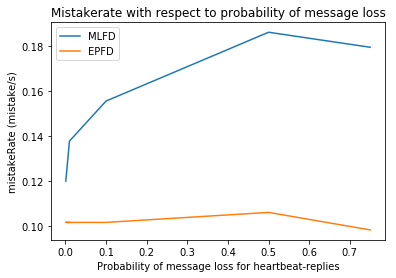

In [32]:
test_info_mlfd = pd.read_csv("./test_info_mlfd.csv")
test_info_epfd = pd.read_csv("./test_info_epfd.csv")
mlfd_data = test_info_mlfd.loc[:,["messageLossProb", "mistakeRate"]]
mlfd_mlp = mlfd_data["messageLossProb"].values
mlfd_adt = mlfd_data["mistakeRate"].values
plt.plot(mlfd_mlp, mlfd_adt, label="MLFD")
epfd_data = test_info_epfd.loc[:,["messageLossProb", "mistakeRate"]]
epfd_mlp = epfd_data["messageLossProb"].values
epfd_adt = epfd_data["mistakeRate"].values
plt.plot(epfd_mlp, epfd_adt, label="EPFD")
plt.ylabel('mistakeRate (mistake/s)')
plt.xlabel('Probability of message loss for heartbeat-replies')
plt.title('Mistakerate with respect to probability of message loss')
plt.legend()
plt.show()